In [ ]:
## Import libraries

import os
import datetime
import time

!pip install pyts
from pyts.datasets import load_gunpoint
from pyts.image import RecurrencePlot
from pyts.image import GramianAngularField
from pyts.image import MarkovTransitionField

import math
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import Model, Sequential
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow.keras.backend as K
from PIL import Image
from dateutil.parser import parse
from typing import List
import seaborn as sns
import torch
from torch import optim
import torch.nn as nn
#!pip install -q keras-tcn --no-dependencies
#from tcn import TCN, tcn_full_summary


# Import Libraries
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Permute
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError, MeanAbsoluteError
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError

from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, SimpleRNN, LSTMCell, MaxPooling1D, Flatten, RepeatVector, GRU, Input

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

!pip install tab2img
from tab2img.converter import Tab2Img

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_path = '/content/drive/MyDrive/1min.csv'

# Load CSV file into a Pandas DataFrame
df = pd.read_csv(df_path)

In [ ]:
# view summary statistics of dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNIX_sec,118123.0,1.529520e+09,1.048954e+07,1.512747e+09,1.519246e+09,1.529882e+09,1.537639e+09,1.548025e+09
ElevationAngle,118123.0,3.671553e+01,1.555254e+01,1.500000e+01,2.526883e+01,3.226930e+01,4.540940e+01,7.836703e+01
AzimuthAngle,118123.0,1.798533e+02,5.399173e+01,7.162534e+01,1.377247e+02,1.798011e+02,2.220086e+02,2.883586e+02
GSI_W/m^2,118123.0,4.997303e+02,2.480852e+02,9.481026e+00,3.054564e+02,4.883511e+02,6.707411e+02,1.263227e+03
Temperature_◦C,118123.0,1.721917e+01,1.019556e+01,-5.225932e+00,8.625206e+00,1.561113e+01,2.626812e+01,3.812885e+01
DewPoint_◦C,118123.0,-1.651166e+00,9.106979e+00,-3.527766e+01,-8.388889e+00,-2.994168e+00,5.422562e+00,1.727000e+01
AtmosphericPressure_mmHg,118123.0,7.652546e+02,4.056089e+00,7.503160e+02,7.627620e+02,7.655560e+02,7.678927e+02,7.767320e+02
WindDirection_radians,118123.0,3.517959e+00,1.309987e+00,0.000000e+00,2.705591e+00,3.703665e+00,4.356675e+00,6.265732e+00
WindVelocity_mile/s,118123.0,2.000713e+00,2.347106e+00,0.000000e+00,4.023360e-01,1.296416e+00,2.683143e+00,2.324419e+01
RelativeHumidity_%,118123.0,3.310109e+01,1.866100e+01,1.000000e+00,1.852584e+01,3.000000e+01,4.400000e+01,9.500000e+01


In [ ]:
# view info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118123 entries, 0 to 118122
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UNIX_sec                  118123 non-null  float64
 1   ElevationAngle            118123 non-null  float64
 2   AzimuthAngle              118123 non-null  float64
 3   GSI_W/m^2                 118123 non-null  float64
 4   Temperature_◦C            118123 non-null  float64
 5   DewPoint_◦C               118123 non-null  float64
 6   AtmosphericPressure_mmHg  118123 non-null  float64
 7   WindDirection_radians     118123 non-null  float64
 8   WindVelocity_mile/s       118123 non-null  float64
 9   RelativeHumidity_%        118123 non-null  float64
 10  readable_datetime         118123 non-null  object 
dtypes: float64(10), object(1)
memory usage: 9.9+ MB


In [ ]:
df.shape

(118123, 11)

In [ ]:
# """
#     Optional stratified sampling. This was only done because the device
#     being used could not handle computation of the entire dataset.
# """

# # Sample a subset of the DataFrame
# sample_size = 500  # Number of rows to sample
# df = df.sample(n=sample_size)

In [ ]:
# df.shape

In [ ]:
# sub-set of columns to be used for model training
df = df[['ElevationAngle', 'AzimuthAngle', 'GSI_W/m^2',
        'Temperature_◦C', 'DewPoint_◦C', 'AtmosphericPressure_mmHg',
        'WindDirection_radians', 'WindVelocity_mile/s', 'RelativeHumidity_%',
        'readable_datetime']]

# change readable_datetime to datetime64 data type
df['readable_datetime'] = pd.to_datetime(df['readable_datetime'], infer_datetime_format=True)

# set readable_datetime as row index
df.set_index(df.readable_datetime,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118123 entries, 2017-12-08 08:36:04 to 2019-01-20 15:50:00
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ElevationAngle            118123 non-null  float64       
 1   AzimuthAngle              118123 non-null  float64       
 2   GSI_W/m^2                 118123 non-null  float64       
 3   Temperature_◦C            118123 non-null  float64       
 4   DewPoint_◦C               118123 non-null  float64       
 5   AtmosphericPressure_mmHg  118123 non-null  float64       
 6   WindDirection_radians     118123 non-null  float64       
 7   WindVelocity_mile/s       118123 non-null  float64       
 8   RelativeHumidity_%        118123 non-null  float64       
 9   readable_datetime         118123 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9)
memory usage: 9.9 MB


In [ ]:
# Convert to radians.
df['ElevationAngle_rad'] = df['ElevationAngle']*np.pi / 180
df['AzimuthAngle_rad'] = df['AzimuthAngle']*np.pi / 180

In [ ]:
# Calculate the wind x and y components.
df['ElevationAngle_cos'] = np.cos(df['ElevationAngle_rad'])
df['ElevationAngle_sin'] = np.sin(df['ElevationAngle_rad'])
df['AzimuthAngle_sin'] = np.cos(df['AzimuthAngle_rad'])
df['AzimuthAngle_cos'] = np.sin(df['AzimuthAngle_rad'])
df['WindDirection_radians_cos'] = np.cos(df['WindDirection_radians'])
df['WindDirection_radians_sin'] = np.sin(df['WindDirection_radians'])

In [ ]:
df.head()

,ElevationAngle,AzimuthAngle,GSI_W/m^2,Temperature_◦C,DewPoint_◦C,AtmosphericPressure_mmHg,WindDirection_radians,WindVelocity_mile/s,RelativeHumidity_%,readable_datetime,ElevationAngle_rad,AzimuthAngle_rad,ElevationAngle_cos,ElevationAngle_sin,AzimuthAngle_sin,AzimuthAngle_cos,WindDirection_radians_cos,WindDirection_radians_sin
readable_datetime,,,,,,,,,,,,,,,,,,
2017-12-08 08:36:04,15.000023,132.825735,247.350955,-1.412616,-10.952546,770.073760,1.909132,0.507345,48.213543,2017-12-08 08:36:04,0.261800,2.318246,0.965926,0.258819,-0.679771,0.733425,-0.331917,0.943309
2017-12-08 08:37:00,15.137937,132.992499,247.783427,-1.401186,-10.975406,770.099889,2.149721,0.456758,48.110672,2017-12-08 08:37:00,0.264207,2.321157,0.965300,0.261144,-0.681903,0.731443,-0.547124,0.837052
2017-12-08 08:38:00,15.286575,133.173234,251.524191,-1.388961,-11.000060,770.128000,2.408999,0.402635,48.000000,2017-12-08 08:38:00,0.266801,2.324311,0.964619,0.263647,-0.684206,0.729288,-0.743443,0.668800
2017-12-08 08:39:00,15.434081,133.353636,252.733730,-1.404770,-11.013234,770.128000,2.506673,0.468360,48.000000,2017-12-08 08:39:00,0.269376,2.327460,0.963937,0.266130,-0.686499,0.727130,-0.805120,0.593113
2017-12-08 08:40:00,15.581838,133.535402,255.725885,-1.420652,-11.026469,770.128000,2.604800,0.534389,48.000000,2017-12-08 08:40:00,0.271954,2.330632,0.963248,0.268614,-0.688803,0.724949,-0.859353,0.511382


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118123 entries, 2017-12-08 08:36:04 to 2019-01-20 15:50:00
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ElevationAngle             118123 non-null  float64       
 1   AzimuthAngle               118123 non-null  float64       
 2   GSI_W/m^2                  118123 non-null  float64       
 3   Temperature_◦C             118123 non-null  float64       
 4   DewPoint_◦C                118123 non-null  float64       
 5   AtmosphericPressure_mmHg   118123 non-null  float64       
 6   WindDirection_radians      118123 non-null  float64       
 7   WindVelocity_mile/s        118123 non-null  float64       
 8   RelativeHumidity_%         118123 non-null  float64       
 9   readable_datetime          118123 non-null  datetime64[ns]
 10  ElevationAngle_rad         118123 non-null  float64       
 11  AzimuthAngle_rad  

In [ ]:
df = df[['readable_datetime', 'ElevationAngle_cos', 'ElevationAngle_sin',
         'WindDirection_radians_cos', 'WindDirection_radians_sin', 'GSI_W/m^2', 'Temperature_◦C',
         'DewPoint_◦C', 'AtmosphericPressure_mmHg', 'WindVelocity_mile/s', 'RelativeHumidity_%']]

In [ ]:
# save date_time object from readable_datetime with specified format
date_time = pd.to_datetime(df.pop('readable_datetime'), format='%d.%m.%Y %H:%M:%S')

In [ ]:
# cocnvert date_time object to seconds and save in dataframe
df['timestamp_s'] = date_time.map(pd.Timestamp.timestamp)

In [ ]:
day = 24*60*60
week = 24*60*60*7
month = 24*60*60*30
year = (365.2425)*day

df['Day sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / day))
df['Day cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / day))
df['Week sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / week))
df['Week cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / week))
df['Month sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / month))
df['Month cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / month))
df['Year sin'] = np.sin(df['timestamp_s'] * (2 * np.pi / year))
df['Year cos'] = np.cos(df['timestamp_s'] * (2 * np.pi / year))

In [ ]:
df.head(2)

,ElevationAngle_cos,ElevationAngle_sin,WindDirection_radians_cos,WindDirection_radians_sin,GSI_W/m^2,Temperature_◦C,DewPoint_◦C,AtmosphericPressure_mmHg,WindVelocity_mile/s,RelativeHumidity_%,timestamp_s,Day sin,Day cos,Week sin,Week cos,Month sin,Month cos,Year sin,Year cos
readable_datetime,,,,,,,,,,,,,,,,,,,
2017-12-08 08:36:04,0.965926,0.258819,-0.331917,0.943309,247.350955,-1.412616,-10.952546,770.073760,0.507345,48.213543,1.512722e+09,0.776963,-0.629546,0.938851,0.344323,-0.646797,-0.762662,-0.389887,0.920863
2017-12-08 08:37:00,0.965300,0.261144,-0.547124,0.837052,247.783427,-1.401186,-10.975406,770.099889,0.456758,48.110672,1.512722e+09,0.774393,-0.632705,0.939051,0.343777,-0.646901,-0.762574,-0.389876,0.920867


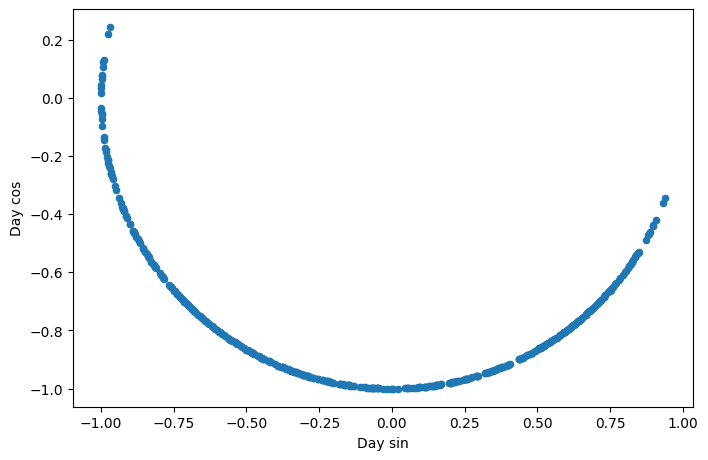

In [ ]:
df.sample(500).plot.scatter('Day sin', 'Day cos').set_aspect('equal')

In [ ]:
#plt.plot(np.array(df['Day sin'])[:5000])
#plt.plot(np.array(df['Day cos'])[:5000])
#plt.xlabel('Time [h]')
#plt.title('Time of day signal')

In [ ]:
df = df[['ElevationAngle_cos', 'ElevationAngle_sin',
         'WindDirection_radians_cos', 'WindDirection_radians_sin',
         'GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
         'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
         'RelativeHumidity_%','Day sin', 'Day cos',
         'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]

In [ ]:
# # split data into train, validation, and test sets
# column_indices = {name: i for i, name in enumerate(df.columns)}

# # Split 70:20:10 (train:validation:test)
# n = len(df)
# train_df = df[0:int(n*0.7)]
# val_df = df[int(n*0.7):int(n*0.9)]
# test_df = df[int(n*0.9):]


# y_train = train_df[['ElevationAngle_cos','ElevationAngle_sin']]
# y_test = test_df[['ElevationAngle_cos','ElevationAngle_sin']]
# y_val = val_df[['ElevationAngle_cos', 'ElevationAngle_sin']]
# train_df = train_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
#                     'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
#                     'RelativeHumidity_%','Day sin', 'Day cos',
#                     'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]
# val_df = val_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
#                   'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
#                   'RelativeHumidity_%','Day sin', 'Day cos',
#                   'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]
# test_df = test_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
#                 'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
#                 'RelativeHumidity_%','Day sin', 'Day cos',
#                 'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]

# #num_features = df.shape[1]

In [ ]:
# Define the normalization methods
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import numpy as np
import pandas as pd
import itertools
# import tensorflow as tf
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_visible_devices(physical_devices[0], 'GPU')

import numpy as np

def unit_vector_scaling(train, val, test):
    train_norm = np.sqrt(np.power(train, 2).sum(axis=1))
    train_norm[train_norm == 0] = 1  # Set zero norms to 1 to avoid division by zero
    train_scaled = train / train_norm[:, np.newaxis]  # Element-wise division using /

    val_norm = np.sqrt(np.power(val, 2).sum(axis=1))
    val_norm[val_norm == 0] = 1
    val_scaled = val / val_norm[:, np.newaxis]

    test_norm = np.sqrt(np.power(test, 2).sum(axis=1))
    test_norm[test_norm == 0] = 1
    test_scaled = test / test_norm[:, np.newaxis]

    return train_scaled, val_scaled, test_scaled

# def log_transformation(train, val, test):
#     train_log = np.log1p(train)
#     val_log = np.log1p(val)
#     test_log = np.log1p(test)
#     return train_log, val_log, test_log

def min_max_scaling(train, val, test):
    # Clip extreme values
    clip_value = 1e9
    train = np.clip(train, -clip_value, clip_value)
    val = np.clip(val, -clip_value, clip_value)
    test = np.clip(test, -clip_value, clip_value)

    # Apply MinMaxScaler
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train)
    val_scaled = scaler.transform(val)
    test_scaled = scaler.transform(test)

    return train_scaled, val_scaled, test_scaled

def decimal_scaling(train, val, test):
    max_abs_val = np.max(np.abs(train))
    scaling_factor = 10 ** np.ceil(np.log10(max_abs_val))
    train_scaled = train / scaling_factor
    val_scaled = val / scaling_factor
    test_scaled = test / scaling_factor
    return train_scaled, val_scaled, test_scaled

def z_score_scaling(train, val, test):
    # Clip extreme values
    clip_value = 1e9
    train = np.clip(train, -clip_value, clip_value)
    val = np.clip(val, -clip_value, clip_value)
    test = np.clip(test, -clip_value, clip_value)

    # Apply StandardScaler
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train)
    val_scaled = scaler.transform(val)
    test_scaled = scaler.transform(test)

    return train_scaled, val_scaled, test_scaled

def median_scaling(train, val, test):
    median = np.median(train)
    train_scaled = train - median
    val_scaled = val - median
    test_scaled = test - median
    return train_scaled, val_scaled, test_scaled

def sigmoid_transformation(train, val, test):
    train_scaled = 1 / (1 + np.exp(-train))
    val_scaled = 1 / (1 + np.exp(-val))
    test_scaled = 1 / (1 + np.exp(-test))
    return train_scaled, val_scaled, test_scaled

def median_mad_scaling(train, val, test):
    median = np.median(train)
    mad = np.median(np.abs(train - median))
    train_scaled = (train - median) / mad
    val_scaled = (val - median) / mad
    test_scaled = (test - median) / mad
    return train_scaled, val_scaled, test_scaled

def tanh_scaling(train, val, test):
    train_scaled = np.tanh(train)
    val_scaled = np.tanh(val)
    test_scaled = np.tanh(test)
    return train_scaled, val_scaled, test_scaled

def pareto_scaling(train, val, test):
    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)
    train_scaled = (train - mean) / np.sqrt(std)
    val_scaled = (val - mean) / np.sqrt(std)
    test_scaled = (test - mean) / np.sqrt(std)
    return train_scaled, val_scaled, test_scaled

def variable_stability_scaling(train, val, test):
    median = np.median(train, axis=0)
    mad = np.median(np.abs(train - median), axis=0)
    mad[mad == 0] = 1  # Set zero MAD values to 1 to avoid division by zero
    train_scaled = (train - median) / mad
    val_scaled = (val - median) / mad
    test_scaled = (test - median) / mad
    return train_scaled, val_scaled, test_scaled

# Add handling for NaN values
def handle_nan_values(data):
    if data.isnull().any().any():
        # Replace NaN values with mean or median
        data = data.fillna(data.mean())
    return data

# Load and split the data into train, validation, and test sets
column_indices = {name: i for i, name in enumerate(df.columns)}

# Split 70:20:10 (train:validation:test)
n = len(df)
train_df = df[0:int(n * 0.7)]
val_df = df[int(n * 0.7):int(n * 0.9)]
test_df = df[int(n * 0.9):]

y_train = train_df[['ElevationAngle_cos','ElevationAngle_sin']]
y_test = test_df[['ElevationAngle_cos','ElevationAngle_sin']]
y_val = val_df[['ElevationAngle_cos', 'ElevationAngle_sin']]
train_df1 = train_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                    'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                    'RelativeHumidity_%','Day sin', 'Day cos',
                    'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]
val_df1 = val_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                  'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                  'RelativeHumidity_%','Day sin', 'Day cos',
                  'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]
test_df1 = test_df[['GSI_W/m^2', 'Temperature_◦C', 'DewPoint_◦C',
                'AtmosphericPressure_mmHg', 'WindVelocity_mile/s',
                'RelativeHumidity_%','Day sin', 'Day cos',
                'Year sin', 'Year cos', 'Week sin', 'Week cos', 'Month sin', 'Month cos']]

# List of normalization methods
normalization_methods = [
    unit_vector_scaling,
    min_max_scaling,
    decimal_scaling,
    z_score_scaling,
    median_scaling,
    sigmoid_transformation,
    median_mad_scaling,
    tanh_scaling,
    pareto_scaling,
    variable_stability_scaling
]

method_names = [
    'UV',
    'MMN',
    'DS',
    'ZS',
    'MS',
    'ST',
    'MMAD',
    'tanh',
    'PS',
    'VSS'
]

# Create a dataframe to store the metrics
metrics_df = pd.DataFrame(columns=['Permutation order', 'RMSE', 'MAE', 'MAPE', 'Training Time', 'loss'])

# Create empty lists to store the learning curves
train_losses = []
val_losses = []

# permutations_list = [(0,),(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(5, 1)]
# permutations_list = [(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,),(1,),(2,)]
permutations_list = [(5, 1),(5, 1),(5, 1),(5, 1),(5, 1),(5, 1),(5, 1)]

# Generate all possible permutations of the normalization methods
# for r in range(1, 2):
#   permutations = list(itertools.permutations(range(len(normalization_methods)), r))  # Generate permutations of length r

# Iterate over each permutation
for permutation in permutations_list:
  start_time = time.time()
  # Create a copy of the original data for each permutation
  normalized_train_df = train_df1.copy()
  normalized_val_df = val_df1.copy()
  normalized_test_df = test_df1.copy()

  # Apply the normalization methods in the current permutation order
  for method_index in permutation:
      method = normalization_methods[method_index]
      normalized_train_df, normalized_val_df, normalized_test_df = method(normalized_train_df, normalized_val_df, normalized_test_df)

  # Convert the normalized data back to pandas DataFrames
  normalized_train_df = pd.DataFrame(normalized_train_df, columns=train_df1.columns)
  normalized_val_df = pd.DataFrame(normalized_val_df, columns=val_df1.columns)
  normalized_test_df = pd.DataFrame(normalized_test_df, columns=test_df1.columns)

  # Handle NaN values after normalization
  normalized_train_df = handle_nan_values(normalized_train_df)
  normalized_val_df = handle_nan_values(normalized_val_df)
  normalized_test_df = handle_nan_values(normalized_test_df)

  # Concatenate with additional dataframes
  normalized_train_df = pd.concat([y_train, normalized_train_df], axis=1)
  normalized_val_df = pd.concat([y_val, normalized_val_df], axis=1)
  normalized_test_df = pd.concat([y_test, normalized_test_df], axis=1)

  class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=normalized_train_df, val_df=normalized_val_df, test_df=normalized_test_df,
                 label_columns=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns # Name of the column that we wish to predict
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)} # Create a dictionary with the name and index of the label column. This will be used for plotting.
            self.column_indices = {name: i for i, name in enumerate(train_df.columns)} # Create a dictionary with the nameand index of each column. This will be used to separate the features from the target variable.

            self.input_width = input_width
            self.label_width = label_width
            self.shift = shift

            self.total_window_size = input_width + shift

            self.input_slice = slice(0, input_width) # The slice function returns a slice object that specifies how to slice a sequence. In this case, it says that the input slice starts at 0 and ends when we reach the input_width.
            self.input_indices = np.arange(self.total_window_size)[self.input_slice] # Assign indices to the inputs. These are useful for plotting.

            self.label_start = self.total_window_size - self.label_width # Get the index at which the label starts. In this case, it is the total window size minus the width of the label.
            self.labels_slice = slice(self.label_start, None) # The same steps that were applied for the inputs are applied for labels.
            self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :] # Slice the window to get the inputs using the input_slice defined in __init__.
        labels = features[:, self.labels_slice, :] # Slice the window to get the labels using the labels_slice defined in __init__.
        if self.label_columns is not None: # If we have more than one target, we stack the labels.
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        inputs.set_shape([None, self.input_width, None]) # The shape will be [batch, time, features]. At this point, we only specify the time dimension and allow the batch and feature dimensions to be defined later.
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col='ElevationAngle_sin', max_subplots=3):
        inputs, labels = self.sample_batch

        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index], label='Inputs', marker='.', zorder=-10) # Plot the inputs. They will appear as a continuous blue line with dots.

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)

            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64) # Plot the labels or actual values. They will appear as green squares.

            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',  c='red', s=64) # Plot the predictions. They will appear as red crosses.

            if n == 0:
                plt.legend()

        plt.xlabel('Time (m)')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data, # Pass in the data. This corresponds to our training set, validation set, or test set.
            targets=None, # Targets are set to None, as they are handled by the split_to_input_labels function.
            sequence_length=self.total_window_size, # Define the total length of the array, which is equal to the total window length.
            sequence_stride=1, # Define the number of timesteps separating each sequence. In our case, we want the sequences to be consecutive, so sequence_stride=1.
            shuffle=True, # Shuffle the sequences. Keep in mind that the data is still in chronological order. We are simply shuffling the order of the sequences, which makes the model more robust.
            batch_size=32 # Define the number of sequences in a single batch.
        )

        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def sample_batch(self): # Get a sample batch of data for plotting purposes. If the sample batch does not exist, we’ll retrieve a sample batch and cache it.
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
            return result

  def compile_and_fit(model, window, patience=3, max_epochs=50):
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=patience, mode='min')

    model.compile(loss=MeanSquaredError(),
                  optimizer=Adam(), metrics=[RootMeanSquaredError(),
                                             MeanAbsoluteError(),
                                             MeanAbsolutePercentageError()])

    history = model.fit(window.train, epochs=max_epochs,
                        validation_data=window.val,
                        callbacks=[early_stopping])

    return history

  KERNEL_WIDTH2 = 3
  LABEL_WIDTH2 = 60
  INPUT_WIDTH2 = LABEL_WIDTH2 + KERNEL_WIDTH2 - 1

  # wide_mo_conv_window = DataWindow(input_width=INPUT_WIDTH2, label_width=60, shift=1, label_columns=['ElevationAngle_sin','ElevationAngle_cos'])
  wide_mo_conv_window = DataWindow(input_width=INPUT_WIDTH2, label_width=60, shift=1, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['ElevationAngle_sin','ElevationAngle_cos'])


  mo_cnn_lstm_GRU_model = Sequential([Conv1D(filters=32,
                                         kernel_size=(KERNEL_WIDTH2,),
                                         activation='relu'),
                                  Dropout(0.25),
                                  tf.compat.v1.keras.layers.CuDNNLSTM(32, return_sequences=True),
                                  Dropout(0.2),
                                  tf.compat.v1.keras.layers.CuDNNLSTM(32, return_sequences=True),
                                  Dropout(0.2),
                                  tf.compat.v1.keras.layers.CuDNNGRU(32, return_sequences=True),
                                  Dropout(0.2),
                                  tf.compat.v1.keras.layers.CuDNNGRU(32, return_sequences=True),
                                  Dropout(0.2),
                                  BatchNormalization(),
                                  Dense(units=32, activation='relu'),
                                  Dropout(0.5),
                                  Dense(units=2)])


  history = compile_and_fit(mo_cnn_lstm_GRU_model, wide_mo_conv_window)

  mo_val_performance = mo_cnn_lstm_GRU_model.evaluate(wide_mo_conv_window.val)
  mo_performance = mo_cnn_lstm_GRU_model.evaluate(wide_mo_conv_window.test, verbose=3)

  # Append the metrics to the list
  #metrics_list.append(mo_performance)

  # Append the metrics to the dataframe
  metrics_df = metrics_df.append({
      "Permutation order": [method_names[i] for i in permutation],
      'RMSE': mo_performance[1],
      'MAE': mo_performance[2],
      'MAPE': mo_performance[3],
  }, ignore_index=True)


Epoch 1/50
2582/2582 [==============================] - 84s 29ms/step - loss: 0.0360 - root_mean_squared_error: 0.1898 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 22.9040 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0797 - val_mean_absolute_error: 0.0612 - val_mean_absolute_percentage_error: 11.0575
Epoch 2/50
2582/2582 [==============================] - 59s 23ms/step - loss: 0.0117 - root_mean_squared_error: 0.1083 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 15.1866 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0681 - val_mean_absolute_error: 0.0478 - val_mean_absolute_percentage_error: 8.2574
Epoch 3/50
2582/2582 [==============================] - 65s 25ms/step - loss: 0.0068 - root_mean_squared_error: 0.0822 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 11.7718 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0616 - val_mean_absolute_error: 0.0505 - val_mean_absolute_percentage_error: 8.4037
Epoch 4/50
2582/25

<ipython-input-22-2c7f910e5aba>:416: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


Epoch 1/50
2582/2582 [==============================] - 68s 24ms/step - loss: 0.0396 - root_mean_squared_error: 0.1990 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 23.2956 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0862 - val_mean_absolute_error: 0.0705 - val_mean_absolute_percentage_error: 12.2325
Epoch 2/50
2582/2582 [==============================] - 59s 23ms/step - loss: 0.0104 - root_mean_squared_error: 0.1020 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 14.4445 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0966 - val_mean_absolute_error: 0.0775 - val_mean_absolute_percentage_error: 13.3759
Epoch 3/50
2582/2582 [==============================] - 57s 22ms/step - loss: 0.0066 - root_mean_squared_error: 0.0810 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 11.6152 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0701 - val_mean_absolute_error: 0.0507 - val_mean_absolute_percentage_error: 9.5987
Epoch 4/50
2582/2

<ipython-input-22-2c7f910e5aba>:416: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


Epoch 1/50
2582/2582 [==============================] - 62s 21ms/step - loss: 0.0475 - root_mean_squared_error: 0.2180 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 25.3091 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0872 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 12.3372
Epoch 2/50
2582/2582 [==============================] - 55s 21ms/step - loss: 0.0114 - root_mean_squared_error: 0.1068 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 15.0972 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0619 - val_mean_absolute_error: 0.0451 - val_mean_absolute_percentage_error: 7.6505
Epoch 3/50
2582/2582 [==============================] - 57s 22ms/step - loss: 0.0066 - root_mean_squared_error: 0.0813 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 11.5758 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0411 - val_mean_absolute_error: 0.0300 - val_mean_absolute_percentage_error: 5.1478
Epoch 4/50
2582/25

<ipython-input-22-2c7f910e5aba>:416: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


Epoch 1/50
2582/2582 [==============================] - 60s 21ms/step - loss: 0.0418 - root_mean_squared_error: 0.2045 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 23.9856 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0823 - val_mean_absolute_error: 0.0603 - val_mean_absolute_percentage_error: 9.9842
Epoch 2/50
2582/2582 [==============================] - 55s 21ms/step - loss: 0.0101 - root_mean_squared_error: 0.1004 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 14.2416 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0517 - val_mean_absolute_error: 0.0368 - val_mean_absolute_percentage_error: 6.4968
Epoch 3/50
2582/2582 [==============================] - 57s 22ms/step - loss: 0.0064 - root_mean_squared_error: 0.0799 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 11.4210 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353 - val_mean_absolute_error: 0.0258 - val_mean_absolute_percentage_error: 4.3947
Epoch 4/50
2582/258

<ipython-input-22-2c7f910e5aba>:416: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


Epoch 1/50
2582/2582 [==============================] - 68s 24ms/step - loss: 0.0428 - root_mean_squared_error: 0.2068 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 24.8187 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1163 - val_mean_absolute_error: 0.0963 - val_mean_absolute_percentage_error: 16.8566
Epoch 2/50
2582/2582 [==============================] - 60s 23ms/step - loss: 0.0133 - root_mean_squared_error: 0.1153 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 16.2131 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0803 - val_mean_absolute_error: 0.0594 - val_mean_absolute_percentage_error: 10.3756
Epoch 3/50
2582/2582 [==============================] - 63s 24ms/step - loss: 0.0110 - root_mean_squared_error: 0.1049 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 14.7142 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0772 - val_mean_absolute_error: 0.0585 - val_mean_absolute_percentage_error: 9.6794
Epoch 4/50
2582/2

<ipython-input-22-2c7f910e5aba>:416: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


Epoch 1/50
2582/2582 [==============================] - 63s 22ms/step - loss: 0.0362 - root_mean_squared_error: 0.1902 - mean_absolute_error: 0.1327 - mean_absolute_percentage_error: 23.0607 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0825 - val_mean_absolute_error: 0.0593 - val_mean_absolute_percentage_error: 10.2727
Epoch 2/50
2582/2582 [==============================] - 62s 24ms/step - loss: 0.0107 - root_mean_squared_error: 0.1035 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 14.6446 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0624 - val_mean_absolute_error: 0.0440 - val_mean_absolute_percentage_error: 7.7703
Epoch 3/50
2582/2582 [==============================] - 57s 22ms/step - loss: 0.0064 - root_mean_squared_error: 0.0798 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 11.4138 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0376 - val_mean_absolute_error: 0.0265 - val_mean_absolute_percentage_error: 4.7854
Epoch 4/50
2582/25

<ipython-input-22-2c7f910e5aba>:416: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


Epoch 1/50
2582/2582 [==============================] - 60s 21ms/step - loss: 0.0572 - root_mean_squared_error: 0.2391 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 26.8915 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0890 - val_mean_absolute_error: 0.0700 - val_mean_absolute_percentage_error: 12.6417
Epoch 2/50
2582/2582 [==============================] - 56s 22ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 15.5325 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0568 - val_mean_absolute_error: 0.0400 - val_mean_absolute_percentage_error: 6.9557
Epoch 3/50
2582/2582 [==============================] - 56s 22ms/step - loss: 0.0072 - root_mean_squared_error: 0.0849 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 12.0892 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0384 - val_mean_absolute_error: 0.0278 - val_mean_absolute_percentage_error: 4.8599
Epoch 4/50
2582/25

<ipython-input-22-2c7f910e5aba>:416: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


In [ ]:
# Save the permutation DataFrame to a CSV file
filename = "chaining_performance_metrics_singles.csv"
metrics_df.to_csv(filename, index=False)

In [ ]:
from google.colab import files

# Download the CSV file
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # Save the figure
# fig1.savefig('learning_curves1.png')
# fig2.savefig('learning_curves2.png')
# fig3.savefig('learning_curves3.png')